In [1]:
# Import necessary Libraries
import os
import sys, platform, os
print(sys.version)
print("--"* 60)
print("sys.platform   :", sys.platform)
print("platform.system():", platform.system())  
print("os.name :", os.name)   
# print(sys.executable)
# print("--"* 60)

3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:42:04) [MSC v.1943 64 bit (AMD64)]
------------------------------------------------------------------------------------------------------------------------
sys.platform   : win32
platform.system(): Windows
os.name : nt


In [2]:
print("Current directory:", os.getcwd())

Current directory: C:\Users\alkas\Downloads\Cell_Cycle_updated_Files\Cell_Cycle_updated_Files\All_DATA_Code_Files


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from plot_utils import set_plot_style, set_spines_black

In [4]:
# Load the data
x = np.loadtxt("DAT_Files/Ex1_Rational_SINDy.dat")
df = pd.DataFrame(x)
print("Top Five rows in the DAT File:")
print(df.head(5))
print("*"* 60)
print("Number of unique values in each column:")
print(df.nunique())


Top Five rows in the DAT File:
         0        1        2    3    4    5
0  5.00000  1.38921  1.38921  2.0  1.0  0.0
1  5.00966  1.38663  1.38663  1.0  1.0  0.0
2  5.01933  1.38406  1.38406  1.0  1.0  0.0
3  5.02899  1.38149  1.38149  1.0  1.0  0.0
4  5.03866  1.37894  1.37894  1.0  1.0  0.0
************************************************************
Number of unique values in each column:
0    2897
1    2944
2    2948
3       4
4       2
5       1
dtype: int64


In [5]:
# Columns
S = x[:, 0]         
R1 = x[:, 1]
R2 = x[:, 2]
regime = x[:, 3].astype(int)

In [6]:
# Find steady state indices for each regime (and positive R1)
ss1 = np.unique(np.where((regime == 1) & (R1 > 0))[0])
ss2 = np.unique(np.where((regime == 2) & (R1 > 0))[0]) 
ss3 = np.unique(np.where((regime == 3) & (R1 > 0))[0])
ss4 = np.unique(np.where((regime == 4) & (R1 > 0))[0])

In [7]:
ss2 = np.where(x[:, 3] == 2)[0]
print('Index where unstable branch starts:', ss2[1])
print('Index where unstable branch ends:', ss2[-1])

Index where unstable branch starts: 572
Index where unstable branch ends: 1483


In [8]:
# coordinates of saddle‐node points
x_sn1, y_sn1 = x[ss2[-1], 0], x[ss2[-1], 1]
x_sn2, y_sn2 = x[ss2[1], 0], x[ss2[1], 1]
print(f"Saddle-node 1: x={x_sn1:.4f}, y={y_sn1:.4f}")
print(f"Saddle-node 2: x={x_sn2:.4f}, y={y_sn2:.4f}")

Saddle-node 1: x=18.7206, y=0.4516
Saddle-node 2: x=10.6260, y=0.5677


In [9]:
# Identify Hopf parameter values from AUTO
hb_params = [18.72442] 
hb_indices = []
tol = 1e-6
for val in hb_params:
    diffs = np.abs(S - val)
    idx0  = np.argmin(diffs)
    if diffs[idx0] > tol:
        print(f"Closest match to {val} is {S[idx0]} (diff={diffs[idx0]:.2e})")
    else:
        print(f"Found Hopf at S[{idx0}] = {S[idx0]}")
    print(f"regime={regime[idx0]}, R1={R1[idx0]}")
    hb_indices.append(idx0)

print("Final Hopf indices:", hb_indices)

Closest match to 18.72442 is 18.7244 (diff=2.00e-05)
regime=1, R1=0.451636
Final Hopf indices: [np.int64(1484)]


In [10]:
hopf_idx = 1484
x_hb, y_hb = S[hopf_idx], R1[hopf_idx]

In [11]:
ss2 = ss2[1:]

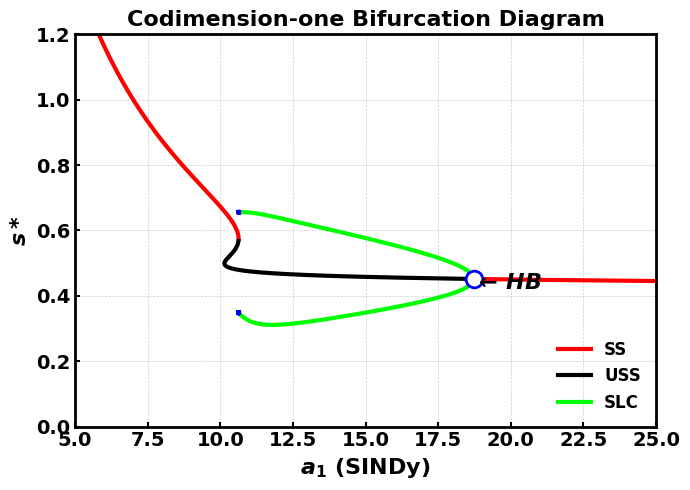

In [12]:
# Initialize Figure
set_plot_style(dpi=100)
plt.figure(figsize=(7, 5))

# Define masks explicitly
red_mask1= (S[ss1] > x_hb)
red_mask2= (S[ss1] < x_sn1)
# Regime 1:
plt.plot(S[ss1][red_mask1], R1[ss1][red_mask1], 'r-', linewidth=3, label='SS')
plt.plot(S[ss1][red_mask2], R1[ss1][red_mask2], 'r-', linewidth=3)
# Regime 2:
plt.plot(S[ss2], R1[ss2], 'k-', linewidth=3, label='USS')

# # Regime 3: 
neon_lime = '#00FF00'  
plt.plot(S[ss3], R1[ss3], '-', color=neon_lime, linewidth=3, label='SLC')
plt.plot(S[ss3], R2[ss3], '-', color=neon_lime, linewidth=3)

# Regime 4: 
plt.plot(S[ss4][1:], R1[ss4][1:],  'b-', linewidth=3.5)
plt.plot(S[ss4][1:], R2[ss4][1:],  'b-', linewidth=3.5)


# Mark the Hopf point 
plt.plot(x_hb, y_hb,
         marker='o', linestyle='',
         markeredgecolor='b', markerfacecolor='white',
         markersize=12, mew=2)

plt.text(
    x_hb+0.02, y_hb-0.03,
    r'$\leftarrow\,HB$',
    fontsize=16,
    fontweight='bold'
)

# Grid, labels, and styling
plt.grid(True, which='both', ls='--', lw=0.5)
plt.title('Codimension-one Bifurcation Diagram')
plt.xlabel(r'$a_1$ (SINDy)', fontsize=16)
plt.ylabel(r'$s*$', fontweight='bold', fontsize=16)
plt.xlim(5, 25)
plt.ylim(0, 1.2)

# Thicken and color the axis spines
ax = plt.gca()
set_spines_black(ax) 

plt.legend(loc='lower right', fontsize=12, frameon=False)
# Save and show
plt.savefig("Plots_1/CDK1_APC_PF_Rational_SINDy_Bifurcation.pdf", bbox_inches="tight")
plt.show()



In [13]:
##############################################################################################################################################